### Reading the data: RBA_KYC_Accounts_ALL_Ids.xlsx

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_excel('/Users/addisonpelayo/Desktop/RBA_KYC_Accounts_ALL_Ids.xlsx')

## Checking some details about the dataset

In [3]:
df.describe()

,org_code,branchCode,customerId,customerType,residentStatus,age_in_year,birthCountry,profession,companyType,lastUpdate,...,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card_Desc,rbaValue
count,224868.0,224868.000000,2.248680e+05,224868.000000,224868.000000,220153.000000,0.0,79748.000000,114574.000000,0.0,...,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,224868.000000,2.248680e+05,0.0,224868.000000
mean,1.0,448.451323,4.394503e+16,1.114418,1.021221,41.310575,NaN,18.309487,49.857577,NaN,...,0.491422,-1.113435e+03,1.131437,-3.540383e+03,0.254305,4.763851e+02,0.868518,2.450953e+03,NaN,17.624194
std,0.0,228.193308,2.349321e+16,0.318319,0.144122,16.000536,NaN,6.586481,6.736115,NaN,...,5.335240,3.028084e+04,19.713739,9.151602e+04,1.175586,2.028110e+04,12.373992,5.819818e+04,NaN,8.368345
min,1.0,201.000000,2.020028e+09,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,...,0.000000,-5.482044e+06,0.000000,-1.654371e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,4.080000
25%,1.0,208.000000,2.070207e+16,1.000000,1.000000,31.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,13.330000
50%,1.0,401.000000,4.011205e+16,1.000000,1.000000,41.000000,NaN,20.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,16.530000
75%,1.0,701.000000,7.012410e+16,1.000000,1.000000,52.000000,NaN,21.000000,51.000000,NaN,...,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,21.330000
max,1.0,805.000000,8.052929e+16,2.000000,2.000000,119.000000,NaN,39.000000,100.000000,NaN,...,1267.000000,0.000000e+00,3292.000000,5.867291e+05,78.000000,8.394000e+06,2858.000000,9.942530e+06,NaN,100.000000


In [15]:
# Back up data frame
back_df = df.copy(deep=True)

In [ ]:
back_df.rba_grade_desc.value_counts()

In [6]:
# df = back_df.copy(deep=True)

In [5]:
## To display all columns of data frame

pd.set_option("display.max_columns", 400)

## TO display all lines of execution
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
## (rows, columns)
df.shape

(224868, 47)

In [18]:
#m1

df = df[['nationalityOriginal','extraNationality','dateOfBirth','age_in_year',
         'birthCountry','birthPlace','profession','companyType','giinCode']]

In [19]:
#m2
## Columns and their data types
df.dtypes

nationalityOriginal     object
extraNationality        object
dateOfBirth             object
age_in_year            float64
birthCountry           float64
birthPlace              object
profession             float64
companyType            float64
giinCode                object
dtype: object

# Exploratory Data Analysis for the Regression Model

## Target Variable

In [8]:
## rbaGradeAbrv, rba_grade_desc are the target variables for the classification model and rbaValue is the target variable for the regression model

target = "rbaValue"
df[target].head()

0    13.20
1    16.93
2    16.93
3    16.93
4    16.93
Name: rbaValue, dtype: float64

In [9]:
df[["rbaGradeAbrv", "rba_grade_desc", "rbaValue"]]

,rbaGradeAbrv,rba_grade_desc,rbaValue
0,L,Low,13.20
1,L,Low,16.93
2,L,Low,16.93
3,L,Low,16.93
4,L,Low,16.93
...,...,...,...
224863,L,Low,16.53
224864,M,Medium,57.60
224865,L,Low,14.53
224866,M,Medium,24.53


In [10]:
## Dropping rbaGradeAbrv and Risk Description till the classification model
df.drop(["rbaGradeAbrv", "rba_grade_desc"], inplace=True, axis=1)
df.columns

Index(['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality', 'dateOfBirth', 'age_in_year',
       'birthCountry', 'birthPlace', 'profession', 'companyType', 'giinCode',
       'lastUpdate', 'status', 'ledgerCode', 'accountCurrency', 'jointAccount',
       'IsBlackListed', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP', 'GENDER',
       'LEGAL_STA_CODE', 'legal_Stat_desc', 'avg_last_10_days',
       'avg_last_30_days', 'avg_last_90_days', 'number_of_cash_dep_90_days',
       'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
       'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'date_of_assessment', 'score_card', 'score_card_Desc', 'rbaValue'],
      dtype='object')

Skewness: 1.379485
Kurtosis: 4.011235


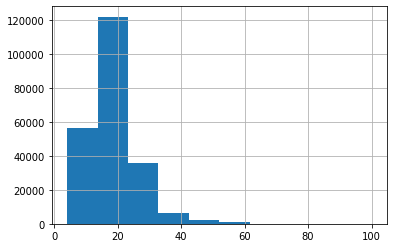

In [11]:
## Distribution of target variable (not balanced)

#skewness and kurtosis
print("Skewness: %f" % df[target].skew())
print("Kurtosis: %f" % df[target].kurt())
df[target].hist()

As we can see the data is not normally distributed. Several sklearn regression models assume a normal distribution, so to improve performance we apply log transformation for better results

Skewness: -0.525717
Kurtosis: 0.355863


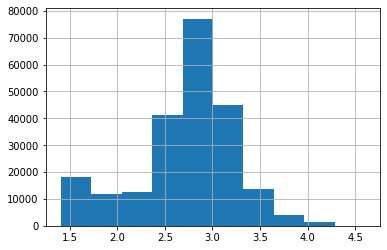

In [12]:
df['rbaValue_Log'] = np.log(df[target])

df["rbaValue_Log"].hist()
# skewness and kurtosis
print("Skewness: %f" % df['rbaValue_Log'].skew())
print("Kurtosis: %f" % df['rbaValue_Log'].kurt())

In [13]:
# dropping old column
df.drop(target, axis= 1, inplace=True)

In [14]:
df.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,score_card,score_card_Desc,rbaValue_Log
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,E-Existing,NaN,2.580217
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,I-Existing,NaN,2.829087
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,I-Existing,NaN,2.829087
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,I-Existing,NaN,2.829087
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,I-Existing,NaN,2.829087


## Data Quality and Missing Data

### Missing data points

In [20]:
#m3

## Looking at the percentage of missing values in the dataset

null_percentage = pd.DataFrame(
    df.apply(lambda x: sum(x.isna()) / df.shape[0]).sort_values(ascending=False)
)
null_percentage.columns = ["Missing percentage"]
null_percentage

,Missing percentage
birthCountry,1.000000
giinCode,0.999947
extraNationality,0.992026
profession,0.645356
companyType,0.490483
birthPlace,0.097133
age_in_year,0.020968
dateOfBirth,0.020968
nationalityOriginal,0.015293


In [21]:
#m4

## Columns birthCountry, giinCode, extraNationality are almost empty so we remove them

df.drop(["birthCountry", "giinCode", "extraNationality"], inplace=True, axis=1)
df.columns

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['nationalityOriginal', 'dateOfBirth', 'age_in_year', 'birthPlace',
       'profession', 'companyType'],
      dtype='object')

20.0    30334
21.0    13155
25.0     6987
23.0     4571
10.0     4100
3.0      3468
17.0     2919
2.0      2078
26.0     1708
15.0     1620
1.0      1278
27.0     1071
8.0      1028
29.0      967
22.0      940
4.0       674
5.0       658
9.0       464
11.0      427
24.0      308
12.0      273
6.0       142
7.0       126
28.0      125
16.0      125
18.0       84
13.0       50
14.0       32
33.0       17
19.0       14
31.0        3
39.0        2
Name: profession, dtype: int64

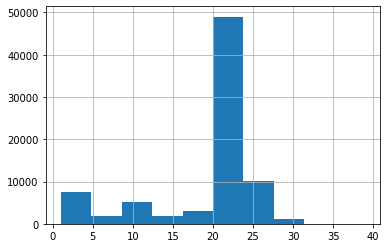

In [22]:
#m5

## Profession Column
df["profession"].value_counts()
df["profession"].hist()

## Missing values should be filled with mode

51.0     89314
54.0     10041
52.0      6150
37.0      3830
35.0      1151
53.0      1011
1.0        955
36.0       819
15.0       419
14.0       251
64.0        81
4.0         67
17.0        63
2.0         51
5.0         47
58.0        45
50.0        33
13.0        31
6.0         26
56.0        26
57.0        25
100.0       22
16.0        20
10.0        16
11.0        15
7.0         12
49.0        11
55.0        10
3.0         10
60.0         9
12.0         7
46.0         4
61.0         2
Name: companyType, dtype: int64

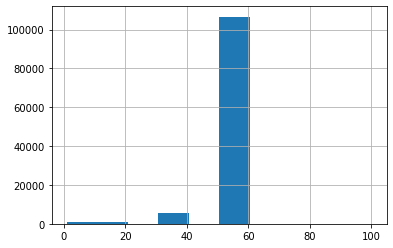

In [23]:
## companyType Column
df["companyType"].value_counts()
df["companyType"].hist()

## Missing values should be filled with mode

In [24]:
## birthPlace Column
df["birthPlace"].value_counts()

## Most of the data is garbage values ("?"). So we will drop this column.

????                  76312
?????                 38740
??????                29904
???????               19465
????????               7690
                      ...  
PV CORPUZ MBT             1
SUNAM                     1
GAMPAHA                   1
bangladesh                1
???? ?? ????/?????        1
Name: birthPlace, Length: 1000, dtype: int64

36.0     6064
38.0     6027
40.0     5788
39.0     5714
35.0     5627
         ... 
108.0       1
102.0       1
97.0        1
100.0       1
99.0        1
Name: age_in_year, Length: 106, dtype: int64

0.08737079222874025

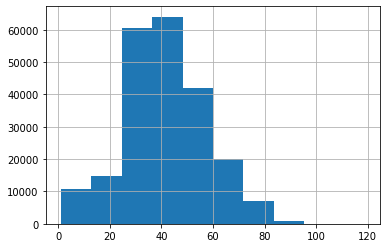

In [25]:
## age_in_year Column
df["age_in_year"].value_counts()
df["age_in_year"].skew() # median or mean ( -1 to 1 -> mean )
df["age_in_year"].hist()

## Missing values should be filled with mean (taking into consideration the skew value)

JO    213141
IQ      3206
EG      1349
SY      1215
LY       433
       ...  
TH         1
SO         1
SG         1
LR         1
BG         1
Name: nationalityOriginal, Length: 67, dtype: int64

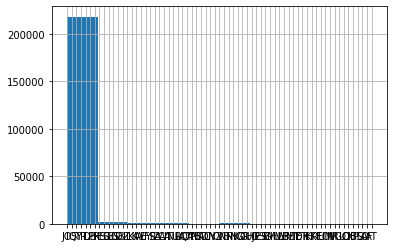

In [26]:
## nationalityOriginal Column
df["nationalityOriginal"].value_counts()
df["nationalityOriginal"].hist()

## Missing values should be filled with mode

In [28]:
## Mode fills for missing values
cols_to_mode = ["profession", "companyType", "nationalityOriginal"]
df[cols_to_mode]=df[cols_to_mode].fillna(df.mode().iloc[0])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
## Dropping columns with garbage values
df.drop(["birthPlace"], inplace=True, axis=1)

In [30]:
## Dropping dateOfBirth because age_in_year is same in terms of meaningful data
df.drop(["dateOfBirth"], inplace=True, axis=1)

In [31]:
## Mean fills for missing values

df["age_in_year"]=df["age_in_year"].fillna(df["age_in_year"].mean())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
null_percentage = pd.DataFrame(
    df.apply(lambda x: sum(x.isna()) / df.shape[0]).sort_values(ascending=False)
)
null_percentage.columns = ["Missing percentage"]v
null_percentage

,Missing percentage
companyType,0.0
profession,0.0
age_in_year,0.0
nationalityOriginal,0.0


### Finding and removing constant columns

In [33]:
## Find constant columns
df.columns[df.nunique()==1]

Index([], dtype='object')

In [34]:
df.head()

,nationalityOriginal,age_in_year,profession,companyType
0,JO,41.310575,20.0,35.0
1,JO,30.000000,27.0,51.0
2,JO,30.000000,27.0,51.0
3,JO,30.000000,27.0,51.0
4,JO,30.000000,27.0,51.0


In [36]:
## Number of unique values in each categorical variable

df.select_dtypes(exclude=["float64", "int64"]).nunique().sort_values(ascending=False)

nationalityOriginal    67
dtype: int64

In [37]:
df.shape

(224868, 4)

In [38]:
df.columns

Index(['nationalityOriginal', 'age_in_year', 'profession', 'companyType'], dtype='object')

### Numerical and Categorical features

In [39]:
numerical_feats = ["age_in_year"]
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = ["nationalityOriginal", "profession", "companyType"]
print("Number of Categorical features: ", len(categorical_feats))


Number of Numerical features:  1
Number of Categorical features:  3


In [40]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['age_in_year'], dtype='object')
****************************************************************************************************
Index(['nationalityOriginal', 'profession', 'companyType'], dtype='object')


In [41]:
df[numerical_feats].head()
df[categorical_feats].head()

,age_in_year
0,41.310575
1,30.000000
2,30.000000
3,30.000000
4,30.000000


,nationalityOriginal,profession,companyType
0,JO,20.0,35.0
1,JO,27.0,51.0
2,JO,27.0,51.0
3,JO,27.0,51.0
4,JO,27.0,51.0


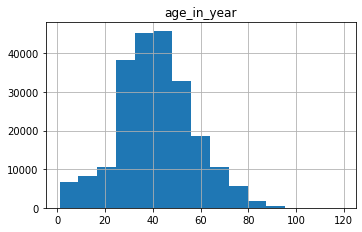

In [42]:
## Plots for all numerical features

df[numerical_feats].hist(bins=15, figsize=(20, 30), layout=(7, 3));

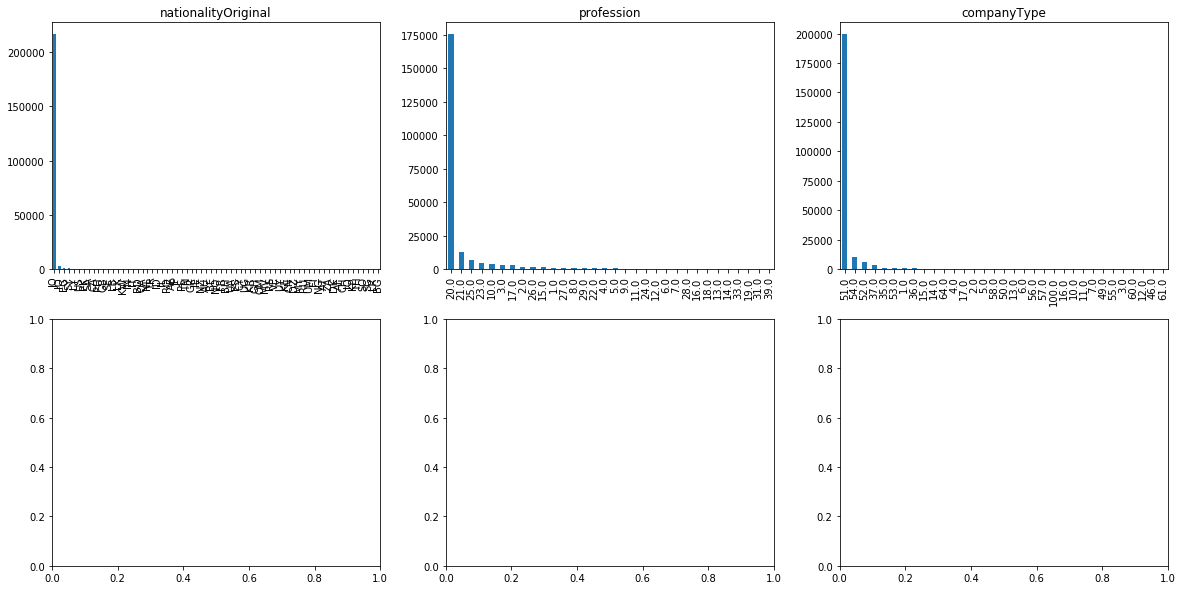

In [64]:
%matplotlib inline
nrows = 2
ncols = 3
fig, axes = plt.subplots(figsize=(20, 10), nrows=nrows, ncols=ncols)

i = 0
flag = False
for r in range(nrows):
    for c in range(ncols):
        df[categorical_feats[i]].value_counts().plot(ax=axes[r][c], kind='bar', title=categorical_feats[i])
        i += 1
        if(i>=len(categorical_feats)):
            flag = True
            break
    if flag:
        break

### Scaling

Scaling helps to normalise the data and several sklearn models converge faster on scaled data.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
## Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

In [59]:
## Function to get specific columns ignoring columns with specified data types (to_ignore) and ignoring 
## the target variable

def get_specific_columns(df, data_type, to_ignore=list(), ignore_target=False):
    columns = df.select_dtypes(include=data_type).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return columns

In [60]:
variables = get_specific_columns(encoded_df, ["float64", "int64"], [target], ignore_target=True)

for v in variables:
    encoded_df[v] = scaler.fit_transform(encoded_df[[v]])

In [61]:
encoded_df.head()

,age_in_year,nationalityOriginal_AE,nationalityOriginal_AF,nationalityOriginal_AT,nationalityOriginal_AU,nationalityOriginal_BD,nationalityOriginal_BE,nationalityOriginal_BG,nationalityOriginal_BH,nationalityOriginal_CA,nationalityOriginal_CH,nationalityOriginal_CN,nationalityOriginal_CY,nationalityOriginal_DK,nationalityOriginal_DZ,nationalityOriginal_EG,nationalityOriginal_ES,nationalityOriginal_FI,nationalityOriginal_FR,nationalityOriginal_GB,nationalityOriginal_GH,nationalityOriginal_GR,nationalityOriginal_ID,nationalityOriginal_IE,nationalityOriginal_IL,nationalityOriginal_IN,nationalityOriginal_IO,nationalityOriginal_IQ,nationalityOriginal_IT,nationalityOriginal_JO,nationalityOriginal_JP,nationalityOriginal_KE,nationalityOriginal_KP,nationalityOriginal_KR,nationalityOriginal_KW,nationalityOriginal_LB,nationalityOriginal_LK,nationalityOriginal_LR,nationalityOriginal_LY,nationalityOriginal_MV,nationalityOriginal_MY,nationalityOriginal_NG,nationalityOriginal_NL,nationalityOriginal_NO,nationalityOriginal_NZ,nationalityOriginal_OM,nationalityOriginal_PH,nationalityOriginal_PK,nationalityOriginal_PS,nationalityOriginal_QA,nationalityOriginal_RO,nationalityOriginal_RS,nationalityOriginal_RU,nationalityOriginal_SA,nationalityOriginal_SE,nationalityOriginal_SG,nationalityOriginal_SO,nationalityOriginal_SY,nationalityOriginal_TH,nationalityOriginal_TN,nationalityOriginal_TR,nationalityOriginal_UA,nationalityOriginal_UG,nationalityOriginal_UM,nationalityOriginal_US,nationalityOriginal_UY,nationalityOriginal_VE,nationalityOriginal_ZA,profession_1.0,profession_2.0,profession_3.0,profession_4.0,profession_5.0,profession_6.0,profession_7.0,profession_8.0,profession_9.0,profession_10.0,profession_11.0,profession_12.0,profession_13.0,profession_14.0,profession_15.0,profession_16.0,profession_17.0,profession_18.0,profession_19.0,profession_20.0,profession_21.0,profession_22.0,profession_23.0,profession_24.0,profession_25.0,profession_26.0,profession_27.0,profession_28.0,profession_29.0,profession_31.0,profession_33.0,profession_39.0,companyType_1.0,companyType_2.0,companyType_3.0,companyType_4.0,companyType_5.0,companyType_6.0,companyType_7.0,companyType_10.0,companyType_11.0,companyType_12.0,companyType_13.0,companyType_14.0,companyType_15.0,companyType_16.0,companyType_17.0,companyType_35.0,companyType_36.0,companyType_37.0,companyType_46.0,companyType_49.0,companyType_50.0,companyType_51.0,companyType_52.0,companyType_53.0,companyType_54.0,companyType_55.0,companyType_56.0,companyType_57.0,companyType_58.0,companyType_60.0,companyType_61.0,companyType_64.0,companyType_100.0
0,4.488055e-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-7.144184e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-7.144184e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-7.144184e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,-7.144184e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [62]:
encoded_df.shape

(224868, 133)

## Creating Training and Test datasets

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
## Splitting our dataset - test - .33% - train - .67%

df_train, df_test = train_test_split(encoded_df, test_size=0.33, random_state=88)

## Model Building

In [133]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [134]:
x_train = df_train.drop(target, axis=1)
x_train = x_train.iloc[:].values
y_train = df_train[target].values

x_test = df_test.drop(target, axis=1)
x_test = x_test.iloc[:].values
y_test = df_test[target].values

In [135]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
y_pred=regressor.predict(x_test)

In [137]:
y_pred

array([2.68641476, 2.5289793 , 2.73506172, ..., 2.68604134, 2.74912713,
       2.79209942])

For Linear Regression the most important model performance metrics are <br>
R2 Score , RMSE value and Mean Absolute Percentage Error (MAPE).<br>
The closer R2 Score is to 1 the more accurate our model.<br>
RMSE value and MAPE value should be low for a good model.</h4>

In [138]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 10)

Mean squared error: 0.19
Coefficient of determination: 0.25
Mean Absolute Error: 0.3133844721615624
Root Mean Squared Error: 0.4309654354140278
Mean Absolute Percentage Error: 1.2978261102661823


In [139]:
df[target].describe()

count    224868.000000
mean          2.756006
std           0.495051
min           1.406097
25%           2.590017
50%           2.805177
75%           3.060115
max           4.605170
Name: rbaValue_Log, dtype: float64

In [140]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
result

,Actual,Predicted
0,2.875258,2.686415
1,2.875258,2.528979
2,2.805177,2.735062
3,3.060115,2.938102
4,1.935860,3.045370
...,...,...
74202,2.676215,2.729643
74203,2.982140,2.690978
74204,2.676215,2.686041
74205,2.805177,2.749127


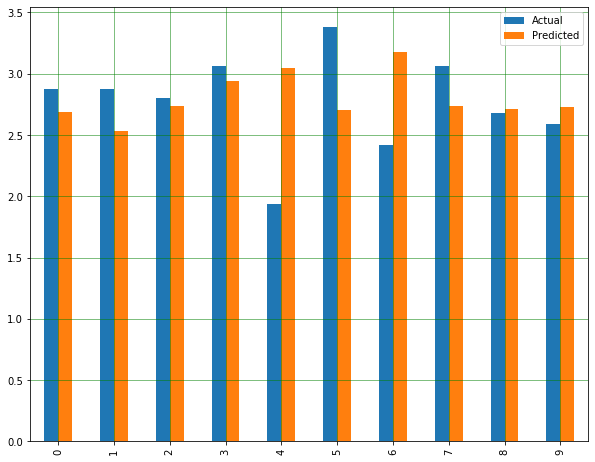

In [141]:
## Plotting 10 records of actual and predicted values

result1 = result[:10]
result1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Binary Classification Model

In [142]:
encoded_df

,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaValue_Log,creationDate_indays,customerType_1,customerType_2,onboarding_0,onboarding_1,residentStatus_1,residentStatus_2,jointAccount_0,jointAccount_1,CUS_CLASS_0,CUS_CLASS_1,CUS_CLASS_2,CUS_CLASS_3,CUS_CLASS_4,CUS_CLASS_5,CUS_CLASS_6,CUS_CLASS_7,CUS_CLASS_8,CUS_CLASS_9,GENDER_1,GENDER_2,LEGAL_STA_CODE_1,LEGAL_STA_CODE_2,LEGAL_STA_CODE_3,LEGAL_STA_CODE_4,score_card_0,score_card_1,score_card_2,score_card_3
0,4.488055e-16,6.491650,6.482677,6.326798,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.580217,-0.466355,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,-7.144184e-01,-0.005911,-0.005947,-0.005121,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,-7.144184e-01,-0.109723,-0.109623,-0.105476,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,-7.144184e-01,-0.004341,-0.004372,-0.003308,0.657625,0.018607,0.145511,0.032676,0.634319,-0.021024,0.010626,-0.041255,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,-7.144184e-01,-0.005576,-0.005587,-0.004863,0.657625,0.018937,0.145511,0.032785,0.634319,-0.020728,0.010626,-0.041152,2.829087,-0.231944,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224863,1.559477e+00,0.056159,0.056035,0.055378,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.805177,-0.852615,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
224864,-1.788202e+00,0.078149,0.077997,0.076797,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,4.053523,1.153362,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
224865,-1.961708e-02,-0.000932,-0.000975,-0.000269,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,2.676215,1.748310,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
224866,1.812132e+00,-0.005994,-0.006002,-0.005121,-0.092109,0.036770,-0.057393,0.038686,-0.216322,-0.023489,-0.070189,-0.042114,3.199897,0.627286,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0


### Adding back Risk Description

In [143]:
encoded_df["Risk_Description"] = back_df["rba_grade_desc"]

In [144]:
## Target Variable

target = "Risk_Description"
encoded_df[target].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [145]:
### Replacing High and Medium values with 1 and Low value with 0

encoded_df[target].replace(to_replace="Low", value=0, inplace=True)
encoded_df[target].replace(to_replace="Medium", value=1, inplace=True)
encoded_df[target].replace(to_replace="High", value=1, inplace=True)

0    159680
1     65188
Name: Risk_Description, dtype: int64

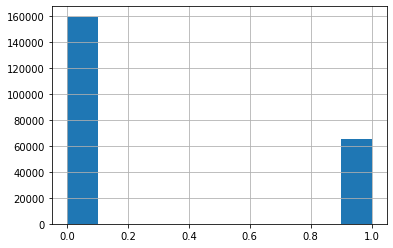

In [146]:
encoded_df[target].value_counts()
encoded_df[target].hist()

In [147]:
encoded_df.drop(["rbaValue_Log"], axis=1, inplace=True)

## Creating Training and Test datasets

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
## Splitting our dataset - test - .33% - train - .67%

df_train, df_test = train_test_split(encoded_df, test_size=0.33, random_state=88)

In [150]:
x_train = df_train.drop(target, axis=1)
x_train = x_train.iloc[:].values
y_train = df_train[target].values

x_test = df_test.drop(target, axis=1)
x_test = x_test.iloc[:].values
y_test = df_test[target].values

## Model Building

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [152]:
lr = LogisticRegression(max_iter=9000)
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=9000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Performace Metrics

In [153]:
# Classification Accuracy

accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", accuracy)

Accuracy:  0.7690110097430162


In [154]:
# Null Accuracy - Accuracy of a model which always predicts 0

max(y_test.mean(), 1 - y_test.mean())

0.7098925977333674

This means that a dumb model that always predicts 0 would be right 71% of the time. So our model accuracy is not that good. Also accuracy is a good metric if the dataset is balanced.

In [155]:
# Calculating the confusion matrix 
# Saving confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred_lr)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

print(f"Confusion matrix:\n{confusion}")


# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[49860  2819]
 [14322  7206]]

Normalized confusion matrix:
[0.94648722 0.05351278]
[0.66527313 0.33472687]


<p>Example confusion matrix: </p>

<img src="https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/09_confusion_matrix_1.png">

## Metrics computed from a confusion matrix

In [156]:
## Classification Accuracy

print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred_lr))

0.7690110097430162
0.7690110097430162


In [157]:
## Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, y_pred_lr))

0.23098899025698386
0.23098899025698383


In [158]:
## Sensitivity

sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, y_pred_lr))

0.334726867335563
0.334726867335563


In [94]:
## Specificity

specificity = TN / (TN + FP)

print(specificity)

0.9464872150192677


In [95]:
## False Positive Rate

false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.05351278498073236
0.05351278498073231


In [96]:
## Precision

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_pred_lr))

0.7188029925187033
0.7188029925187033


<p>The confusion matrix is a more accurate metric for model performance. We can decide whether our model is ideal or not based on which sections of the confusion matrix we want to maximize. For example, in health related predictions false positives should be minimum.</p>